In [1]:
# project: p1
# submitter: chen2328
# partner: none
# hours: 10

In [2]:
#q1
type(7/2)

float

In [3]:
#q2
x = 4
maximum = 10
minimum = 5
error = x not in range(5,10) # True if x is outside the minimum-to-maximum range
error

True

In [4]:
#q3
word = "KAFKAESQUE"
suffix_match = word[5:].lower() == 'esque' # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [5]:
#q4
def add(x1, x2=1):
    return x1+x2
add(3,4)

7

In [6]:
#q5
add(9)

10

In [7]:
#q6
x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [8]:
def smart_count(nums):
    ans = 0
    for i in nums:
        if i > 10:
            continue
        elif i < 0:
            break
        else:
            ans += i
    return ans

In [9]:
#q7
nums = [3, 4, 1, 6]

smart_count(nums)

14

In [10]:
#q8 
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [11]:
#q9
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [12]:
#q10
rows[0][-1]['x']

8

In [13]:
#q11
import copy
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [14]:
#q12
total = 0
for i in range(len(rows)):
    total += rows[i][header.index('B')]
total

10007

In [15]:
#q13
rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [16]:

f = open("usd.json")
data = f.read()
print(type(data))
print(data[:500] + "...")

<class 'str'>
{"eur":{"code":"EUR","alphaCode":"EUR","numericCode":"978","name":"Euro","rate":0.87247211399168,"date":"Sun, 6 Feb 2022 11:55:01 GMT","inverseRate":1.1461684378941},"gbp":{"code":"GBP","alphaCode":"GBP","numericCode":"826","name":"U.K. Pound Sterling","rate":0.73726210930731,"date":"Sun, 6 Feb 2022 11:55:01 GMT","inverseRate":1.3563697189586},"jpy":{"code":"JPY","alphaCode":"JPY","numericCode":"392","name":"Japanese Yen","rate":114.97731798247,"date":"Sun, 6 Feb 2022 11:55:01 GMT","inverseRate"...


In [17]:
#q14
import json
f = open("usd.json")
data = json.load(f)
for k, v in data['eur'].items():
    if k == 'rate':
        rate =v 
ans = 400 / v
ans

348.9888455966696

In [18]:
#q15
def divide(x, y):
    try:
        result = x / y
    except ZeroDivisionError:
        return float("nan")
    return result
divide(3,2)
        


1.5

In [19]:
#q16
divide(-3,0)

nan

In [20]:
import os
import pandas as pd
path = 'home-computers'
dirs = os.listdir(path)

years = {}
for file in dirs:
    years[int(file.split('.')[0][-4:])] = pd.read_csv(path + '/' + file, skiprows=1).set_index("Geographic Area Name")

In [21]:
#q17
lst = []
for key in years:
    lst.append(key)
lst.sort()
lst

[2013, 2014, 2015, 2016, 2017, 2018]

In [22]:
#q18
years[2018].loc['Wisconsin']['Estimate!!Total']

2371960

In [23]:
#q19
years[2018].loc[:]['Estimate!!Total!!No Computer'].sum()

10285814

In [24]:
#q20
ans = years[2018].loc[:]['Margin of Error!!Total!!No Computer'] / years[2018].loc[:]['Estimate!!Total!!No Computer']
ans.max()

0.12375641594322287

In [25]:
#q21
state_lst = ['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
dic = {}
total = years[2018].loc[:]['Estimate!!Total'].sum()

for state in state_lst:
    dic[state] = years[2018].loc[state]['Estimate!!Total!!No Computer'] / years[2018].loc[state]['Estimate!!Total'] * 100

dic

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

<AxesSubplot:xlabel='Geographic Area Name', ylabel='% of Households w/o Computers'>

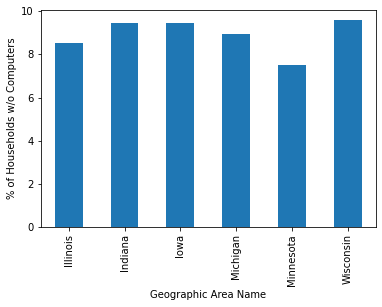

In [26]:
#q22
dic = pd.Series(dic)
dic.plot.bar(xlabel='Geographic Area Name', ylabel='% of Households w/o Computers')


<AxesSubplot:xlabel='Year', ylabel='WI Households without Computers(thousands)'>

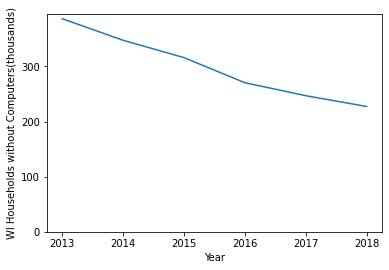

In [27]:
#q23
# question
wi_dic = {}
for key, value in years.items():
    wi_dic[key] = years[key].loc['Wisconsin']['Estimate!!Total!!No Computer'] / 1000

wi_dic = pd.Series(wi_dic).sort_index()
wi_dic.plot.line(xlabel='Year', ylabel='WI Households without Computers(thousands)', yticks=[0, 100, 200, 300])

<AxesSubplot:xlabel='Smartphone (millions)', ylabel='Tablets (millions)'>

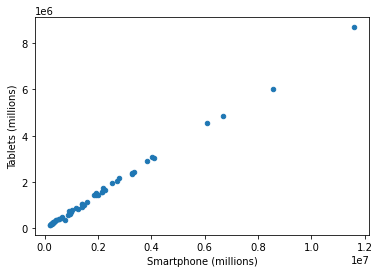

In [28]:
#q24
df = years[2018]
df.plot.scatter(x='Estimate!!Total!!Has one or more types of computing devices!!Smartphone', 
                y='Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer',
                xlabel='Smartphone (millions)',
                ylabel='Tablets (millions)')

In [29]:
#q25
from subprocess import check_output

check_output(["git", "checkout", "main"], cwd='/home/chenyenchun/s22/p1/flask')
output = check_output(["git", "log"], cwd='/home/chenyenchun/s22/p1/flask')
str_output = str(output, encoding="utf-8").split('\n')
str_output[0]


Already on 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [30]:
#q26
check_output(["git", "checkout", "main"], cwd='/home/chenyenchun/s22/p1/flask')
lst = []
for s in str_output:
    if s[:6] == 'commit':
        lst.append(s.split(' ')[1])
        
lst[-50:]


Already on 'main'


['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [3]:
commit_id = lst[-3]
commit_id
checkout_output = check_output(["git", "checkout", commit_id], cwd='/home/chenyenchun/s22/p1/flask')

NameError: name 'lst' is not defined

In [4]:
#q27
f = open('/home/chenyenchun/s22/p1/flask/README', 'r')
f.read()

FileNotFoundError: [Errno 2] No such file or directory: '/home/chenyenchun/s22/p1/flask/README'

In [33]:

check_output(["git", "checkout", "main"], cwd='/home/chenyenchun/s22/p1/flask')
log_output = check_output(["git", "log"], cwd='/home/chenyenchun/s22/p1/flask')

Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


In [34]:
#q28
log_output = str(output, encoding="utf-8").split('\n')
log_output

# log_dict = defaultdict(int)
log_dict = {}
for s in log_output:
    if 'Merge pull request' in s:
        name = s.split('/')[0].split(' ')[-1]
        if '#' in name:
            continue
#         log_dict[name] += 1
        if name not in log_dict:
            log_dict[name] = 1
        else:
            log_dict[name] += 1
log_dict

{'Yourun-proger': 2,
 'olliemath': 1,
 'pallets': 204,
 'jugmac00': 1,
 'pgjones': 14,
 'eprigorodov': 1,
 'HenryKobin': 1,
 'delicb': 1,
 'vinzid': 1,
 'karintou8710': 1,
 'kkirsche': 2,
 'matipau': 1,
 'Makonede': 1,
 'sprutner': 1,
 'Jalkhov': 1,
 'KPLauritzen': 1,
 'greyli': 42,
 'esadek': 1,
 'na2shell': 1,
 'Rohan-Salwan': 1,
 'default-303': 1,
 'awijaya22': 1,
 'starlightknown': 1,
 'yuxiaoy1': 4,
 'kaushikk25': 1,
 'Elahi-cs': 1,
 'Hugo0': 1,
 'dannysepler': 1,
 'rafaVls': 1,
 'brettlangdon': 1,
 'oleksis': 1,
 'andrewjroth': 1,
 'ThiefMaster': 11,
 'kangetsu121': 1,
 'mbpreble': 1,
 'tonydelanuez': 1,
 'elliott-king': 1,
 'huimingz': 1,
 'lielfr': 1,
 'tirkarthi': 3,
 'nphilipp': 1,
 'WolframAlph': 1,
 'MLH-Fellowship': 2,
 'MartinThoma': 1,
 'ebonnecab': 1,
 'jackwardell': 3,
 'jab': 3,
 'DeepOde': 1,
 'stat1c-void': 1,
 'lgiordani': 1,
 'iomintz': 1,
 'jeffwidman': 8,
 'kx-chen': 1,
 'jeenuv': 1,
 'pgkrit': 1,
 'valleygtc': 1,
 'shanavas786': 1,
 'mattc41190': 2,
 'gnumoksha

In [35]:
#q29
import subprocess 
from subprocess import PIPE

try:
    check_output(["pip3", "instal"], stderr=PIPE)
except subprocess.CalledProcessError as e:
    output = str(e.stderr, encoding="utf-8")
output

'ERROR: unknown command "instal" - maybe you meant "install"\n'

In [36]:
import numpy as np
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])
rows_lst = [1000, 2000, 3000, 4000, 5000]


<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

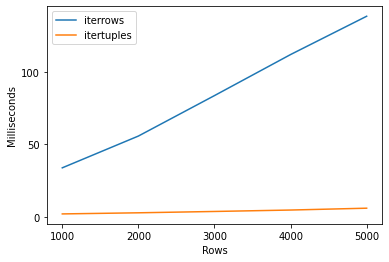

In [37]:
#q30

from time import time

times_df = pd.DataFrame(dtype=float)

for row in rows_lst:  # iterrows
    t0 = time()
    df = rand_df(row)
    for r in df.iterrows():
        pass
    
    t1 = time()
    iterrows_time = t1-t0
    times_df.at[row, "iterrows"] = iterrows_time * 1000
    
for row in rows_lst:  # itertuples
    t0 = time()
    df = rand_df(row)
    for r in df.itertuples():
        pass
    
    t1 = time()
    itertuples_time = t1-t0
    times_df.at[row, "itertuples"] = itertuples_time * 1000

times_df.plot.line(xlabel='Rows', ylabel='Milliseconds', yticks=[0, 50, 100], xticks=rows_lst)

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

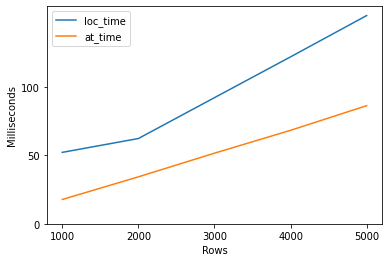

In [38]:
#q31
times_df_31 = pd.DataFrame(dtype=float)

for row in rows_lst:  # loc
    t0_31 = time()
    df = rand_df(row)
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1_31 = time()
    
    loc_time = t1_31 - t0_31

    times_df_31.at[row, "loc_time"] = loc_time * 1000

for row in rows_lst:  # at
    t0_31 = time()
    df = rand_df(row)
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t1_31 = time()
    
    at_time = t1_31 - t0_31

    times_df_31.at[row, "at_time"] = at_time * 1000

times_df_31.plot.line(xlabel='Rows', ylabel='Milliseconds', yticks=[0, 50, 100], xticks=rows_lst)

In [39]:
def laugh(x):
    return "ha" * x

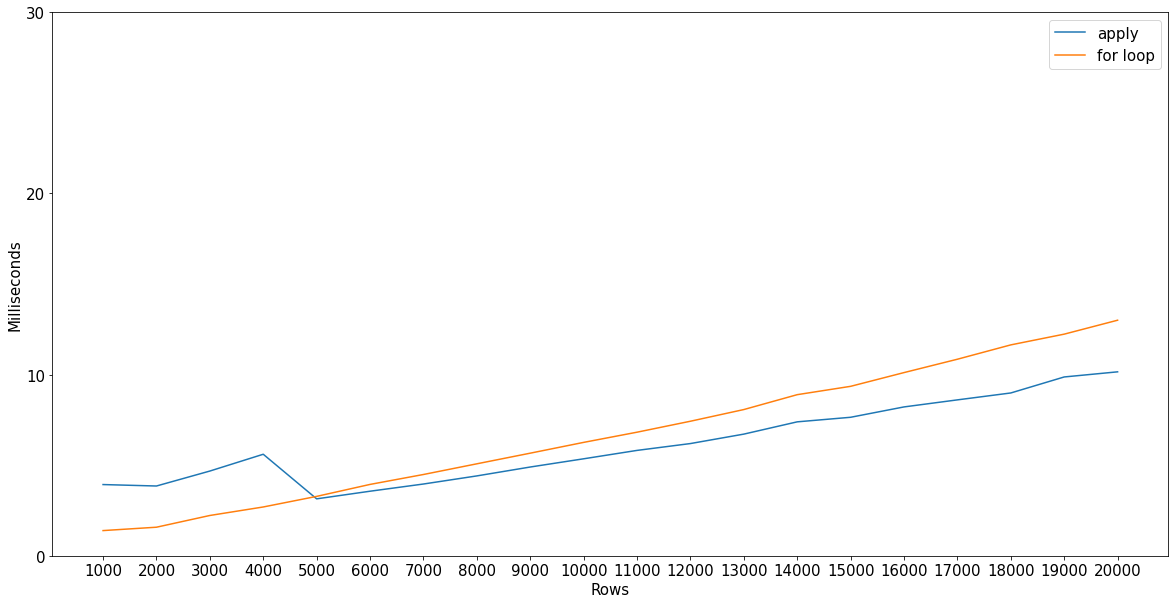

In [40]:
#q32
rows_lst = [1000, 2000, 3000, 4000, 5000]
times_df_32 = pd.DataFrame(dtype=float)

for row in range(1000, 21000, 1000): # apply
    t0_32 = time()
    
    df_32 = rand_df(row)
    df_32["A"].apply(laugh).tolist()
    
    t1_32 = time()
    first_time = t1_32 - t0_32
    
    times_df_32.at[row, "apply"] = first_time * 1000


for row in range(1000, 21000, 1000): # loop
    t0_32 = time()
    
    df_32 = rand_df(row)  
    result = []
    for val in df_32["A"]:
        result.append(laugh(val))
        
    t1_32 = time()
    second_time = t1_32 - t0_32
    
    times_df_32.at[row, "for loop"] = second_time * 1000
 

ax1 = times_df_32.plot.line(xlabel='Rows', 
                      ylabel='Milliseconds', 
                      yticks=[0, 10, 20, 30], 
                      xticks=range(1000, 21000, 1000),
                      fontsize=15,
                      figsize=(20,10))
ax1.set_ylabel('Milliseconds',fontdict={'fontsize':15})
ax1.set_xlabel('Rows',fontdict={'fontsize':15})
ax1.legend(loc=1,fontsize=15)